In [1]:
cd /pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis/

/pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis


In [2]:
import pickle
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import json
import gc
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
data_path = 'Data/sepsis_removed_0.pkl'
pkl = pickle.load(open(data_path, 'rb'))
data = pkl[0]
oc = pkl[1]
train_ind = pkl[2]
valid_ind = pkl[3]
test_ind = pkl[4]
del pkl

In [4]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_inds = pos_oc['ts_ind'].to_list()

In [5]:
data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.000000,1.000000
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.000000,1.000000
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.000000,1.000000
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.000000,1.000000
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.000000,1.000000
...,...,...,...,...,...,...,...
82886223,57281,20.400000,MBP,0.195381,chart,78.552377,17.645628
82886224,57281,20.400000,O2 Saturation,-0.678068,chart,96.820961,4.160290
82886225,57281,20.400000,RR,0.179866,chart,26.278501,15.130729
82886226,57281,20.400000,SBP,-0.404061,chart,120.239648,25.341836


In [6]:
text_data = data[data.variable == 'Text']
text_data

,ts_ind,hour,variable,value,TABLE,mean,std
0,10223,467.816667,Text,Admission Date: [**2119-5-4**] D...,noteevents,1.0,1.0
1,18407,28.016667,Text,Admission Date: [**2112-12-8**] ...,noteevents,1.0,1.0
2,40300,155.166667,Text,Admission Date: [**2194-7-18**] ...,noteevents,1.0,1.0
3,23747,52.383333,Text,Admission Date: [**2194-1-7**] D...,noteevents,1.0,1.0
4,2357,73.133333,Text,Admission Date: [**2186-6-7**] Discharge ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
1407425,31015,99.400000,Text,NPN\n\n\n#1 Infant remains in RA with O2 sats...,noteevents,1.0,1.0
1407426,31015,105.783333,Text,"Neonatology\nDOL #5, CGA 36 weeks. \n\nCVR: Co...",noteevents,1.0,1.0
1407427,31015,112.650000,Text,Family Meeting Note\nFamily meeting held with ...,noteevents,1.0,1.0
1407428,31015,114.033333,Text,NPN 1800\n\n\n#1 Resp: [**Known lastname 2243*...,noteevents,1.0,1.0


In [7]:
text_data.sort_values(['ts_ind', 'hour'])

,ts_ind,hour,variable,value,TABLE,mean,std
638818,0,5.683333,Text,rn progress note\nneuro; pt aox3 pt affect slo...,noteevents,1.0,1.0
453442,0,9.066667,Text,[**2198-2-15**] 8:32 AM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
453932,0,11.133333,Text,[**2198-2-15**] 10:36 AM\n CHEST (PORTABLE AP)...,noteevents,1.0,1.0
453987,0,15.666667,Text,[**2198-2-15**] 3:08 PM\n CHEST (PORTABLE AP) ...,noteevents,1.0,1.0
638069,0,18.933333,Text,RESP: PT. INTUBATED AFTER SEVERAL ATTEMPT AT N...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...
742243,57280,16.966667,Text,TRANSFER NOTE FROM N-SICU\nD: 80 YR OLD RETIRE...,noteevents,1.0,1.0
675206,57281,1.000000,Text,Mr. [**Known lastname 829**] is a 60 yr gentle...,noteevents,1.0,1.0
17469,57281,5.400000,Text,PATIENT/TEST INFORMATION:\nIndication: Coronar...,noteevents,1.0,1.0
675207,57281,9.300000,Text,"CCU NPN 1900-0700\nS: "" Can I go home tomorrow...",noteevents,1.0,1.0


In [8]:
oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
1,1,188028,270,0
2,2,173727,271,0
3,3,164716,272,0
4,4,158689,273,0
...,...,...,...,...
57376,45558,143774,94944,0
57377,45559,123750,94950,0
57378,50487,196881,94953,0
57379,45560,118475,94954,0


In [9]:
pos_oc = oc[oc['in_hospital_sepsis']==1]
pos_oc

,ts_ind,HADM_ID,SUBJECT_ID,in_hospital_sepsis
0,0,110404,268,1
8,7,192224,279,1
25,48221,179726,292,1
43,31,194340,305,1
68,52,172132,329,1
...,...,...,...,...
57274,45480,187410,90658,1
57311,45509,133967,91950,1
57343,45536,116543,94828,1
57347,45540,133042,94846,1


In [10]:
# pos_inds = pos_oc['ts_ind'].to_list()
# pos_inds

## ALL

In [11]:
text_data_24 = text_data[text_data.hour <= 24].reset_index()
text_data_24

,index,ts_ind,hour,variable,value,TABLE,mean,std
0,8,53658,1.433333,Text,Admission Date: [**2145-11-30**] ...,noteevents,1.0,1.0
1,9,55730,17.083333,Text,Admission Date: [**2194-8-15**] ...,noteevents,1.0,1.0
2,11,4140,19.600000,Text,Admission Date: [**2193-5-30**] Dischar...,noteevents,1.0,1.0
3,17,50150,12.716667,Text,Admission Date: [**2157-5-31**] ...,noteevents,1.0,1.0
4,25,30691,19.716667,Text,Admission Date: [**2118-7-10**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
316730,1407409,30881,8.983333,Text,NPN\nplease see above note for delivery histor...,noteevents,1.0,1.0
316731,1407410,30881,16.483333,Text,NPN 11p-7a\n\n\n#1 Infant placed to RA @ shift...,noteevents,1.0,1.0
316732,1407411,30881,21.233333,Text,"NNP PE\n\nResp: Comfortable effort, BS clear a...",noteevents,1.0,1.0
316733,1407422,29375,0.700000,Text,NICU Attending Admission Note\nPt is a 34 [**6...,noteevents,1.0,1.0


In [12]:
stopwords = set(STOPWORDS)
stopwords.add('-')
stopwords.add('kg')
stopwords.add('______________________________________________________________________________ FINAL')
stopwords.add('Hospital')
stopwords.add('MEDICAL')
stopwords.add('image002')
stopwords.add('jpg')
stopwords.add('mg')
stopwords.add('Mg')
stopwords.add('Number')
stopwords.add('year old')
# stopwords.add('old')
stopwords.add('year')
stopwords.add('s')
stopwords.add('p')
stopwords.add('L')
stopwords.add('mEq')
stopwords.add('_')
stopwords.add('mL')
stopwords.add('dL')
stopwords.add('Name')
stopwords.add('lastname')
stopwords.add('Last Name')
stopwords.add('First Name')
stopwords.add('patient')
# stopwords.add('')

In [13]:
clinical_stop_words = {
    # General Medical Terms
    "patient", "doctor", "nurse", "physician", "hospital", "clinic", 
    
    # Common Abbreviations and Acronyms
    "mg", "ml", "bpm", "hr", "bp", "temp", "wbc", "rbc", "hgb", "hct", "bmi", "iv", "po", 
    "tid", "qid", "bid", "prn", "stat", 'uL', 'uL g', 'g', 'PM', 
    
    # observed ones
    'Code statu', 'Doctor Last', 'Dr Last', 'Name8', 'NamePattern2', 'Dr'
    
#     # Common Phrases and Connectors
#     "follow up", "follow-up", "followup", "signs and symptoms", "history of", "present with", 
#     "as well as", "due to", "related to", "secondary to", "in relation to", "with respect to", 
#     "in terms of", "Month", "M", "evaluation", "evaluate", "un"
    
#     # Miscellaneous Terms
#     "male", "female", "age", "year-old", "y.o.", "day", "week", "month", "year", "normal", "abnormal", 
#     "within normal limits", "wnl", "positive", "negative", "unremarkable", "remarkable", "versus", 
#     "vs.", "per", "according to", "noted"  
#         "health", "care", "treatment", 
#     "medication", "medicine", "therapy", "dosage", "symptom", "diagnosis", "condition", "disease", 
#     "illness", "procedure", "surgery", "operation", "test", "result", "examination", "consultation", "visit",
    
}

In [14]:
stopwords |= clinical_stop_words

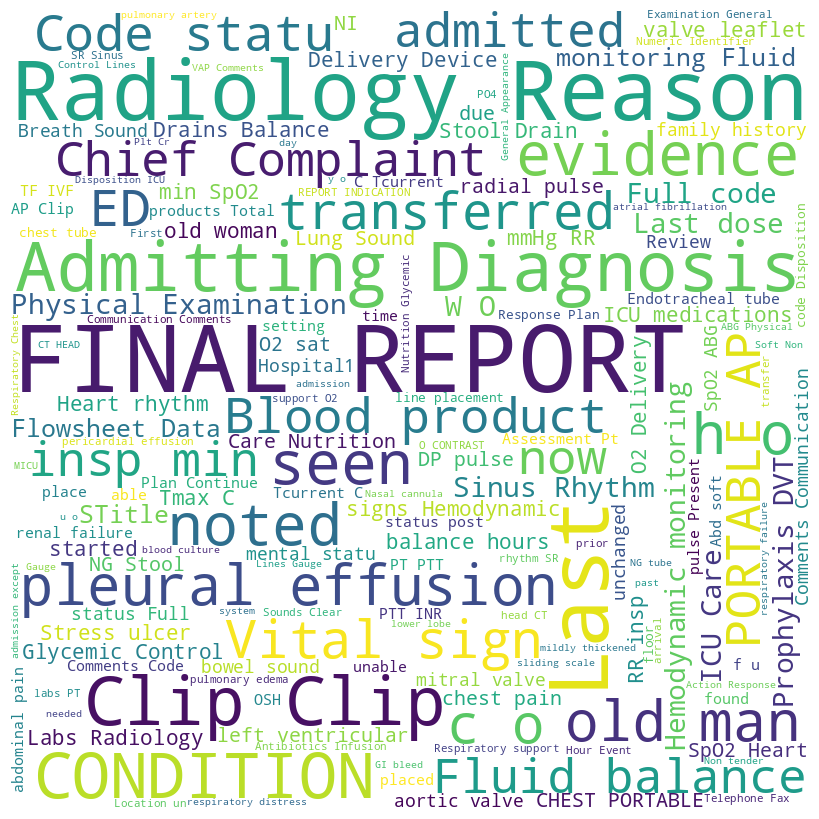

In [15]:
texts_24 = " ".join(text for text in text_data_24.value)
words = texts_24.split()
filtered_words = [word for word in words if '_' not in word]

filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(filtered_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('24_all.png')

In [16]:
all_words = wordcloud.words_.keys()
all_words

dict_keys(['FINAL REPORT', 'Radiology Reason', 'Last', 'Admitting Diagnosis', 'Clip Clip', 'CONDITION', 'seen', 'evidence', 'noted', 'h o', 'pleural effusion', 'old man', 'c o', 'Vital sign', 'transferred', 'ED', 'Code statu', 'now', 'Blood product', 'Chief Complaint', 'admitted', 'Fluid balance', 'PORTABLE AP', 'insp min', 'Physical Examination', 'Hemodynamic monitoring', 'Last dose', 'Full code', 'Sinus Rhythm', 'Prophylaxis DVT', 'W O', 'ICU Care', 'monitoring Fluid', 'STitle', 'Flowsheet Data', 'signs Hemodynamic', 'balance hours', 'Heart rhythm', 'Labs Radiology', 'old woman', 'ICU medications', 'Stool Drain', 'RR insp', 'valve leaflet', 'Stress ulcer', 'min SpO2', 'Glycemic Control', 'O2 Delivery', 'mmHg RR', 'Delivery Device', 'started', 'Tmax C', 'Drains Balance', 'left ventricular', 'due', 'chest pain', 'DP pulse', 'O2 sat', 'NI', 'NG Stool', 'Lung Sound', 'radial pulse', 'Care Nutrition', 'SpO2 Heart', 'CHEST PORTABLE', 'family history', 'Review', 'unchanged', 'bowel sound', 

In [17]:
all = ['FINAL REPORT', 'Last', 'Radiology Reason', 'Clip Clip', 'seen', 'evidence', 'noted', 'h o', 'pleural effusion', 'old man', 'c o', 'Vital sign', 'transferred', 'ED', 'Code statu', 'now', 'Blood product', 'Chief Complaint', 'admitted', 'Fluid balance', 'PORTABLE AP', 'insp min', 'Hemodynamic monitoring', 'Last dose', 'Full code', 'Sinus Rhythm', 'Prophylaxis DVT', 'W O', 'STitle', 'monitoring Fluid', 'Flowsheet Data', 'signs Hemodynamic', 'balance hours', 'Heart rhythm', 'Labs Radiology', 'old woman', 'ICU medications', 'Stool Drain', 'RR insp', 'valve leaflet', 'Stress ulcer', 'min SpO2', 'Glycemic Control', 'O2 Delivery', 'mmHg RR', 'Delivery Device', 'started', 'Tmax C', 'Drains Balance', 'due', 'left ventricular', 'chest pain', 'NI', 'DP pulse', 'O2 sat', 'NG Stool', 'Lung Sound', 'radial pulse', 'SpO2 Heart', 'CHEST PORTABLE', 'family history', 'Review', 'bowel sound', 'unchanged', 'mental statu', 'Comments Communication', 'Hospital1', 'mitral valve', 'status Full', 'Breath Sound', 'aortic valve', 'SpO2 ABG', 'products Total', 'TF IVF', 'setting', 'Abd soft', 'f u', 'able', 'Tcurrent C', 'C Tcurrent', 'place', 'Assessment Pt', 'unable', 'renal failure', 'Comments Code', 'found', 'Endotracheal tube', 'time', 'OSH', 'status post', 'pulse Present', 'Plan Continue', 'placed', 'abdominal pain', 'PT PTT', 'PTT INR', 'floor', 'AP Clip', 'line placement', 'prior', 'chest tube', 'Response Plan', 'code Disposition', 'Respiratory support', 'head CT', 'pericardial effusion', 'PO4', 'Sounds Clear', 'Location un', 'REPORT INDICATION', 'Hour Event', 'Antibiotics Infusion', 'First', 'Communication Comments', 'labs PT', 'rhythm SR', 'Numeric Identifier', 'SR Sinus', 'support O2', 'Nutrition Glycemic', 'pulmonary edema', 'arrival', 'transfer', 'Telephone Fax', 'O CONTRAST', 'respiratory distress', 'y o', 'MICU', 'pulmonary artery', 'Soft Non', 'Disposition ICU', 'Control Lines', 'VAP Comments', 'past', 'system', 'Non tender', 'Lines Gauge', 'needed', 'blood culture', 'Action Response', 'sliding scale', 'respiratory failure', 'atrial fibrillation', 'Gauge', 'mildly thickened', 'day', 'General Appearance', 'Respiratory Chest', 'CT HEAD', 'lower lobe', 'Nasal cannula', 'admission except', 'admission', 'Plt Cr', 'u o', 'NG tube', 'ABG Physical', 'GI bleed', 'Peripheral Vascular', 'Allergies Last', 'morning', 'left lower', 'Admitting', 'assessed Left', 'Left radial', 'pain control', 'Right radial', 'Abdominal Soft', 'systems Flowsheet', 'Social History', 'time spent', 'may', 'CORONARY ARTERY', 'Total time', 'CONTRAST Clip', 'shift', 'post op', 'presented', 'd c', 'ordered', 'wall motion', 'Left DP', 'Right DP', 'Drug Allergies', 'pneumothorax', 'discussed', 'sounds present', 'Known Drug', 'Assessment Action', 'Vascular Right', 'Order date', 'urine output', 'concern', 'currently', 'd t', 'interval change', 'systolic function', 'CT scan', 'consistent', 'Present Left']

In [18]:
wordcloud.words_

{'FINAL REPORT': 1.0,
 'Radiology Reason': 0.9786997400514724,
 'Last': 0.9754794821721868,
 'Admitting Diagnosis': 0.9511529557828848,
 'Clip Clip': 0.8948954386146425,
 'CONDITION': 0.7903857843073859,
 'seen': 0.710034530476055,
 'evidence': 0.6926658303480207,
 'noted': 0.6711198479107122,
 'h o': 0.6503886295151508,
 'pleural effusion': 0.6367445650065311,
 'old man': 0.6257905151119331,
 'c o': 0.5914798960205889,
 'Vital sign': 0.5706969465747578,
 'transferred': 0.5431242967810354,
 'ED': 0.541417172122137,
 'Code statu': 0.5354810341036949,
 'now': 0.5210092727907608,
 'Blood product': 0.5186943082911941,
 'Chief Complaint': 0.49804068647103705,
 'admitted': 0.488276450732641,
 'Fluid balance': 0.48768154365454003,
 'PORTABLE AP': 0.4867762502748212,
 'insp min': 0.4865434605486078,
 'Physical Examination': 0.4798184240135535,
 'Hemodynamic monitoring': 0.4797537602007165,
 'Last dose': 0.4755118140786053,
 'Full code': 0.4745677224111843,
 'Sinus Rhythm': 0.47324858062930825,

In [19]:
data = wordcloud.words_
df = pd.DataFrame(list(data.items()), columns=['Word', 'Frequency'])
latex_table = df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lr}
\toprule
                  Word &  Frequency \\
\midrule
          FINAL REPORT &   1.000000 \\
      Radiology Reason &   0.978700 \\
                  Last &   0.975479 \\
   Admitting Diagnosis &   0.951153 \\
             Clip Clip &   0.894895 \\
             CONDITION &   0.790386 \\
                  seen &   0.710035 \\
              evidence &   0.692666 \\
                 noted &   0.671120 \\
                   h o &   0.650389 \\
      pleural effusion &   0.636745 \\
               old man &   0.625791 \\
                   c o &   0.591480 \\
            Vital sign &   0.570697 \\
           transferred &   0.543124 \\
                    ED &   0.541417 \\
            Code statu &   0.535481 \\
                   now &   0.521009 \\
         Blood product &   0.518694 \\
       Chief Complaint &   0.498041 \\
              admitted &   0.488276 \\
         Fluid balance &   0.487682 \\
           PORTABLE AP &   0.486776 \\
              insp min &  

/scratch/slurm_tmpdir/job_23793458/ipykernel_174618/131539929.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=False)


## POS

In [20]:
text_data_24_pos = text_data_24[text_data_24['ts_ind'].isin(pos_inds)]
text_data_24_pos

,index,ts_ind,hour,variable,value,TABLE,mean,std
11,55,46328,1.866667,Text,Admission Date: [**2136-5-25**] ...,noteevents,1.0,1.0
13,60,48934,5.466667,Text,Admission Date: [**2120-11-15**] ...,noteevents,1.0,1.0
17,66,46792,4.866667,Text,Admission Date: [**2164-6-24**] ...,noteevents,1.0,1.0
23,103,52260,4.983333,Text,Admission Date: [**2123-8-15**] ...,noteevents,1.0,1.0
24,107,55319,9.333333,Text,Admission Date: [**2130-10-23**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
314622,1390589,31741,17.350000,Text,Chief Complaint:\n 24 Hour Events:\n 2 uni...,noteevents,1.0,1.0
314629,1390627,29252,15.883333,Text,Chief Complaint:\n 24 Hour Events:\n Dopa ...,noteevents,1.0,1.0
314670,1390834,34681,5.766667,Text,Subjective\n Pt intubated\n Objective\n ...,noteevents,1.0,1.0
314687,1390924,26449,21.116667,Text,"TITLE:\n Chief Complaint: cough, malaise, hy...",noteevents,1.0,1.0


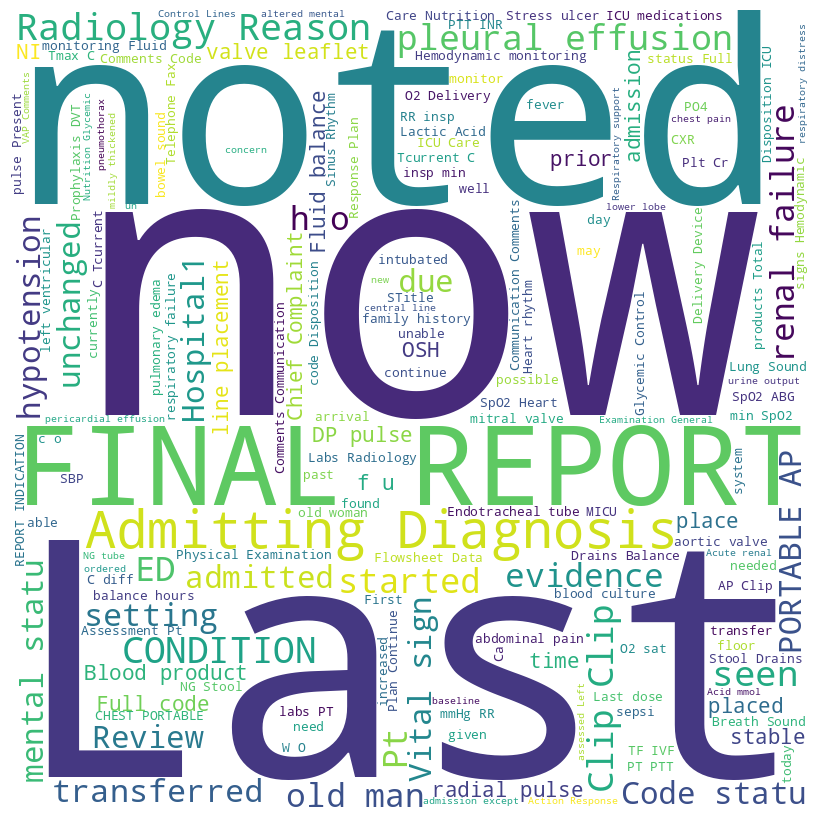

In [21]:
texts_24_pos = " ".join(text for text in text_data_24_pos.value)
words = texts_24_pos.split()
filtered_words = [word for word in words if '_' not in word]
filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(filtered_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('24_pos.png')

In [22]:
pos_words = wordcloud.words_.keys()
pos_words

dict_keys(['now', 'Last', 'noted', 'FINAL REPORT', 'Admitting Diagnosis', 'Radiology Reason', 'seen', 'CONDITION', 'pleural effusion', 'Clip Clip', 'ED', 'Pt', 'started', 'evidence', 'h o', 'renal failure', 'old man', 'transferred', 'setting', 'unchanged', 'hypotension', 'Hospital1', 'mental statu', 'due', 'admitted', 'PORTABLE AP', 'Code statu', 'Vital sign', 'Review', 'Blood product', 'radial pulse', 'DP pulse', 'placed', 'admission', 'Chief Complaint', 'prior', 'valve leaflet', 'NI', 'place', 'line placement', 'Full code', 'stable', 'Fluid balance', 'time', 'f u', 'OSH', 'Hemodynamic monitoring', 'day', 'given', 'unable', 'Last dose', 'Physical Examination', 'CHEST PORTABLE', 'insp min', 'monitoring Fluid', 'ICU Care', 'Flowsheet Data', 'signs Hemodynamic', 'balance hours', 'Labs Radiology', 'family history', 'Prophylaxis DVT', 'abdominal pain', 'old woman', 'ICU medications', 'left ventricular', 'RR insp', 'Stool Drains', 'min SpO2', 'Tmax C', 'mmHg RR', 'Glycemic Control', 'Stress

In [23]:
wordcloud.words_

{'now': 1.0,
 'Last': 0.9847123855588185,
 'noted': 0.9465365348073933,
 'FINAL REPORT': 0.9206253238901365,
 'Admitting Diagnosis': 0.8941958887545345,
 'Radiology Reason': 0.8747624805665918,
 'seen': 0.8256175505268613,
 'CONDITION': 0.809207116945932,
 'pleural effusion': 0.7574710658144758,
 'Clip Clip': 0.7523751943340818,
 'ED': 0.6907065123510105,
 'Pt': 0.6854378994645016,
 'started': 0.6718776990844706,
 'evidence': 0.6453618932458111,
 'h o': 0.6261012264639834,
 'renal failure': 0.6164277077215409,
 'old man': 0.6054586284332355,
 'transferred': 0.5793746761098635,
 'setting': 0.5760062186906202,
 'unchanged': 0.5539816894109518,
 'hypotension': 0.5442217999654517,
 'Hospital1': 0.5309207116945932,
 'mental statu': 0.5241837968561064,
 'due': 0.5213335636552081,
 'admitted': 0.5118327863188806,
 'PORTABLE AP': 0.503973052340646,
 'Code statu': 0.5024183796856106,
 'Vital sign': 0.49559509414406633,
 'Review': 0.4895491449300397,
 'Blood product': 0.47901191915702196,
 'radi

In [24]:
data = wordcloud.words_
df = pd.DataFrame(list(data.items()), columns=['Word', 'Frequency'])
latex_table = df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lr}
\toprule
                  Word &  Frequency \\
\midrule
                   now &   1.000000 \\
                  Last &   0.984712 \\
                 noted &   0.946537 \\
          FINAL REPORT &   0.920625 \\
   Admitting Diagnosis &   0.894196 \\
      Radiology Reason &   0.874762 \\
                  seen &   0.825618 \\
             CONDITION &   0.809207 \\
      pleural effusion &   0.757471 \\
             Clip Clip &   0.752375 \\
                    ED &   0.690707 \\
                    Pt &   0.685438 \\
               started &   0.671878 \\
              evidence &   0.645362 \\
                   h o &   0.626101 \\
         renal failure &   0.616428 \\
               old man &   0.605459 \\
           transferred &   0.579375 \\
               setting &   0.576006 \\
             unchanged &   0.553982 \\
           hypotension &   0.544222 \\
             Hospital1 &   0.530921 \\
          mental statu &   0.524184 \\
                   due &  

/scratch/slurm_tmpdir/job_23793458/ipykernel_174618/131539929.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=False)


In [25]:
len(pos_words)

200

In [26]:
'sepsis' in pos_words

False

In [27]:
'septic' in pos_words

False

In [28]:
'SIRS' in pos_words

False

## NEG

In [ ]:
text_data_24_neg = text_data_24[~text_data_24['ts_ind'].isin(pos_inds)]
text_data_24_neg

,index,ts_ind,hour,variable,value,TABLE,mean,std
0,8,53658,1.433333,Text,Admission Date: [**2145-11-30**] ...,noteevents,1.0,1.0
1,9,55730,17.083333,Text,Admission Date: [**2194-8-15**] ...,noteevents,1.0,1.0
2,11,4140,19.600000,Text,Admission Date: [**2193-5-30**] Dischar...,noteevents,1.0,1.0
3,17,50150,12.716667,Text,Admission Date: [**2157-5-31**] ...,noteevents,1.0,1.0
4,25,30691,19.716667,Text,Admission Date: [**2118-7-10**] ...,noteevents,1.0,1.0
...,...,...,...,...,...,...,...,...
316730,1407409,30881,8.983333,Text,NPN\nplease see above note for delivery histor...,noteevents,1.0,1.0
316731,1407410,30881,16.483333,Text,NPN 11p-7a\n\n\n#1 Infant placed to RA @ shift...,noteevents,1.0,1.0
316732,1407411,30881,21.233333,Text,"NNP PE\n\nResp: Comfortable effort, BS clear a...",noteevents,1.0,1.0
316733,1407422,29375,0.700000,Text,NICU Attending Admission Note\nPt is a 34 [**6...,noteevents,1.0,1.0


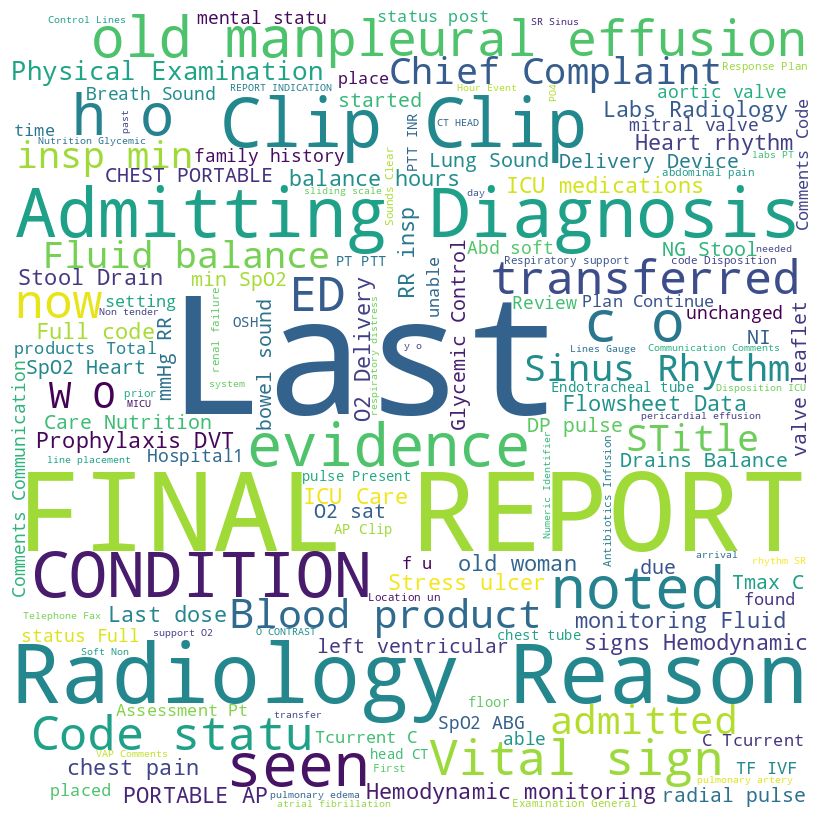

In [ ]:
texts_24_neg = " ".join(text for text in text_data_24_neg.value)
words = texts_24_neg.split()
filtered_words = [word for word in words if '_' not in word]
filtered_text = ' '.join(filtered_words)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(filtered_text)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('24_neg.png')

In [ ]:
neg_words = wordcloud.words_.keys()
neg_words

dict_keys(['Last', 'FINAL REPORT', 'Radiology Reason', 'Admitting Diagnosis', 'Clip Clip', 'CONDITION', 'seen', 'evidence', 'noted', 'h o', 'c o', 'old man', 'pleural effusion', 'Vital sign', 'now', 'transferred', 'ED', 'Code statu', 'Blood product', 'admitted', 'Chief Complaint', 'Sinus Rhythm', 'STitle', 'insp min', 'Fluid balance', 'W O', 'Physical Examination', 'Hemodynamic monitoring', 'PORTABLE AP', 'Last dose', 'Full code', 'Prophylaxis DVT', 'Heart rhythm', 'ICU Care', 'monitoring Fluid', 'Flowsheet Data', 'signs Hemodynamic', 'balance hours', 'Labs Radiology', 'old woman', 'chest pain', 'ICU medications', 'Stool Drain', 'RR insp', 'Stress ulcer', 'O2 Delivery', 'Delivery Device', 'min SpO2', 'Glycemic Control', 'NI', 'mmHg RR', 'valve leaflet', 'started', 'due', 'Tmax C', 'Drains Balance', 'O2 sat', 'left ventricular', 'NG Stool', 'Lung Sound', 'Care Nutrition', 'SpO2 Heart', 'bowel sound', 'DP pulse', 'radial pulse', 'CHEST PORTABLE', 'family history', 'Review', 'unchanged', 

In [ ]:
wordcloud.words_

{'Last': 1.0,
 'FINAL REPORT': 0.9750617970132662,
 'Radiology Reason': 0.9587386096037678,
 'Admitting Diagnosis': 0.9242931738068423,
 'Clip Clip': 0.8846845792683818,
 'CONDITION': 0.7642206263072445,
 'seen': 0.6919071509017245,
 'evidence': 0.6778071933186093,
 'noted': 0.6567011364799836,
 'h o': 0.6295397036668665,
 'c o': 0.6053181997689011,
 'old man': 0.6052158141847913,
 'pleural effusion': 0.5918618087144759,
 'Vital sign': 0.5615117962819407,
 'now': 0.5432871623104039,
 'transferred': 0.5263789144202782,
 'ED': 0.5249455162427415,
 'Code statu': 0.5205283096140063,
 'Blood product': 0.5055068817739033,
 'admitted': 0.48579034357676726,
 'Chief Complaint': 0.4833184630461174,
 'Sinus Rhythm': 0.47991048574646406,
 'STitle': 0.47704368939139086,
 'insp min': 0.4759905805262619,
 'Fluid balance': 0.4744694232766312,
 'W O': 0.4704032529362723,
 'Physical Examination': 0.4678289868215127,
 'Hemodynamic monitoring': 0.4662932030598663,
 'PORTABLE AP': 0.46518158814667465,
 'La

In [ ]:
data = wordcloud.words_
df = pd.DataFrame(list(data.items()), columns=['Word', 'Frequency'])
latex_table = df.to_latex(index=False)
print(latex_table)

\begin{tabular}{lr}
\toprule
                  Word &  Frequency \\
\midrule
                  Last &   1.000000 \\
          FINAL REPORT &   0.975062 \\
      Radiology Reason &   0.958739 \\
   Admitting Diagnosis &   0.924293 \\
             Clip Clip &   0.884685 \\
             CONDITION &   0.764221 \\
                  seen &   0.691907 \\
              evidence &   0.677807 \\
                 noted &   0.656701 \\
                   h o &   0.629540 \\
                   c o &   0.605318 \\
               old man &   0.605216 \\
      pleural effusion &   0.591862 \\
            Vital sign &   0.561512 \\
                   now &   0.543287 \\
           transferred &   0.526379 \\
                    ED &   0.524946 \\
            Code statu &   0.520528 \\
         Blood product &   0.505507 \\
              admitted &   0.485790 \\
       Chief Complaint &   0.483318 \\
          Sinus Rhythm &   0.479910 \\
                STitle &   0.477044 \\
              insp min &  

/scratch/slurm_tmpdir/job_23793458/ipykernel_174618/131539929.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=False)


In [ ]:
for w in pos_words:
    if w not in neg_words:
        print(w+" \\\\")

Pt \\
hypotension \\
stable \\
given \\
Stool Drains \\
today \\
well \\
SBP \\
increased \\
Ca \\
possible \\
C diff \\
continue \\
fever \\
sepsi \\
Lactic Acid \\
need \\
monitor \\
CXR \\
concern \\
altered mental \\
central line \\
Acute renal \\
Acid mmol \\
new \\
urine output \\
un \\
baseline \\
Alk Phos \\
improved \\
infection \\
tip \\
Hour Events \\
ALT AST \\
M \\
levophed \\
Arterial Line \\
Multi Lumen \\
T Bili \\
treated \\
Vascular Right \\
Plan \\
Month \\
obtained \\


In [ ]:
set(all_words) & set(pos_words) & set(neg_words)

{'AP Clip',
 'Action Response',
 'Admitting Diagnosis',
 'Assessment Pt',
 'Blood product',
 'Breath Sound',
 'C Tcurrent',
 'CHEST PORTABLE',
 'CONDITION',
 'Care Nutrition',
 'Chief Complaint',
 'Clip Clip',
 'Code statu',
 'Comments Code',
 'Comments Communication',
 'Communication Comments',
 'Control Lines',
 'DP pulse',
 'Delivery Device',
 'Disposition ICU',
 'Drains Balance',
 'ED',
 'Endotracheal tube',
 'Examination General',
 'FINAL REPORT',
 'First',
 'Flowsheet Data',
 'Fluid balance',
 'Full code',
 'Gauge',
 'Glycemic Control',
 'Heart rhythm',
 'Hemodynamic monitoring',
 'Hospital1',
 'ICU Care',
 'ICU medications',
 'Labs Radiology',
 'Last',
 'Last dose',
 'Left DP',
 'Left radial',
 'Lung Sound',
 'MICU',
 'NG Stool',
 'NG tube',
 'NI',
 'Nutrition Glycemic',
 'O2 Delivery',
 'O2 sat',
 'OSH',
 'PO4',
 'PORTABLE AP',
 'PT PTT',
 'PTT INR',
 'Peripheral Vascular',
 'Physical Examination',
 'Plan Continue',
 'Plt Cr',
 'Prophylaxis DVT',
 'REPORT INDICATION',
 'RR insp